In [36]:
import tensorflow as tf
import sys
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import importlib


path = "../../"
model_path = path + "models/"
test_path = path + "data/test/"
model_path_cull = model_path + "cull%i/" % 5
devtest_path = path + "data/cull5/model_data/"
fasta_seq_path = test_path + "casp11.fasta"
pdb_path = test_path + "casp11.targets_refine/"

sys.path.insert(0, model_path + "model_functions")
sys.path.insert(0, path + "preprocess")

import primary_model as pm
import fasta_to_1_hot_encodings as fthe
import get_contact_maps as gcm
import visualization as tv


%matplotlib inline
importlib.reload(gcm)
importlib.reload(fthe)
importlib.reload(tv)

<module 'visualization' from '/Users/jinli/Projects/Protein-Structures/tertiary_structure_prediction/visualization/model_visualization/visualization.py'>

In [2]:
# model = tf.keras.models.load_model(
#         model_path_cull + 'my_model.h5',
#         custom_objects={"OuterProduct2": pm.OuterProduct()}
#     )

model = pm.create_architecture(3,14)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.load_weights(model_path_cull + "best_weight/Double_Resid_Network_weights.best.hdf5")

In [4]:
# model.summary()

In [5]:
tf.__version__

'1.13.1'

In [6]:
fasta_seqs, time_str = fthe.convert_fasta_to_1_hot(fasta_seq_path, train=False)

In [7]:
fasta_seqs

{'T0817': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'T0828': array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'T0774': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'T0780': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [

In [8]:
c_maps, time_str = gcm.get_contact_maps(pdb_path, train=False)

PDB File:  TR274.pdb
PDB File:  TR857.pdb
PDB File:  TR856.pdb
PDB File:  TR854.pdb
PDB File:  TR827.pdb
PDB File:  TR833.pdb
PDB File:  TR774.pdb
PDB File:  TR760.pdb
PDB File:  TR776.pdb
PDB File:  TR762.pdb
PDB File:  TR217.pdb
PDB File:  TR821.pdb
PDB File:  TR772.pdb
PDB File:  TR228.pdb
PDB File:  TR837.pdb
PDB File:  TR823.pdb
PDB File:  TR822.pdb
PDB File:  TR759.pdb
PDB File:  TR765.pdb
PDB File:  TR768.pdb
PDB File:  TR783.pdb
PDB File:  TR782.pdb
PDB File:  TR769.pdb
PDB File:  TR780.pdb
PDB File:  TR810.pdb
PDB File:  TR811.pdb
PDB File:  TR795.pdb
PDB File:  TR829.pdb
PDB File:  TR828.pdb
PDB File:  TR786.pdb
PDB File:  TR792.pdb
PDB File:  TR816.pdb
PDB File:  TR803.pdb
PDB File:  TR817.pdb
PDB File:  TR283.pdb
PDB File:  TR848.pdb
PDB File:  TR280.pdb


In [9]:
c_maps = c_maps[0]

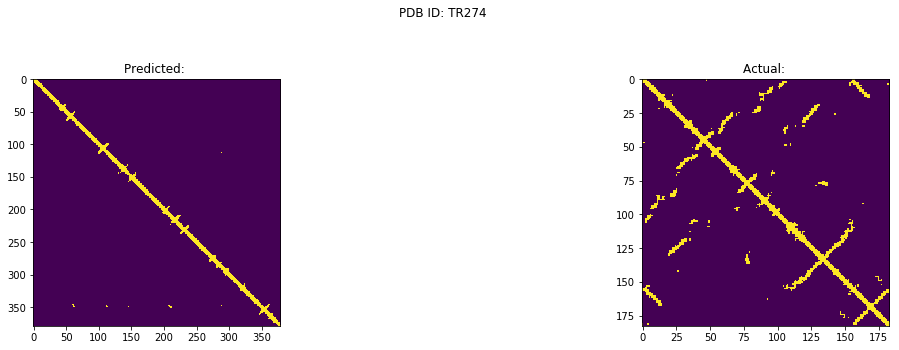

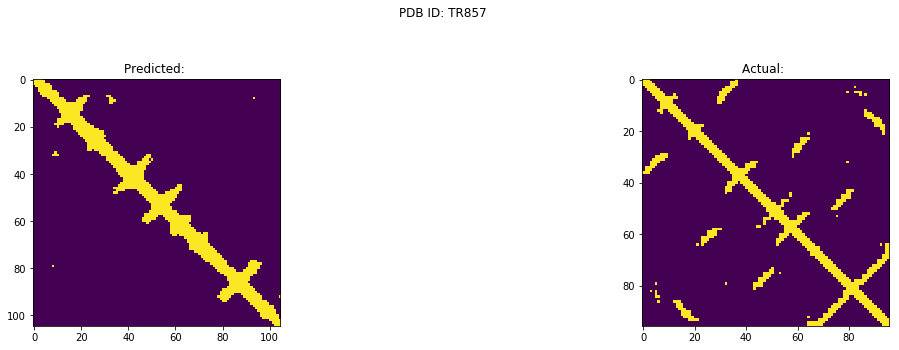

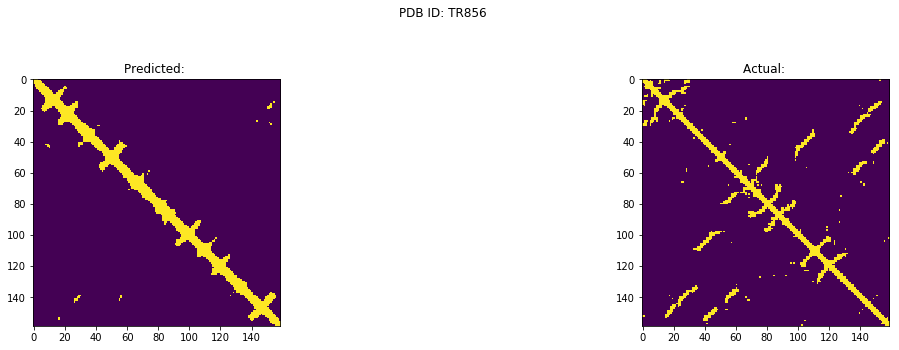

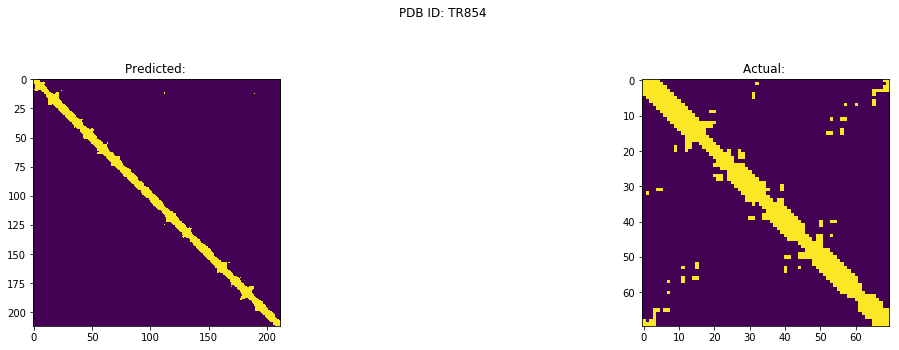

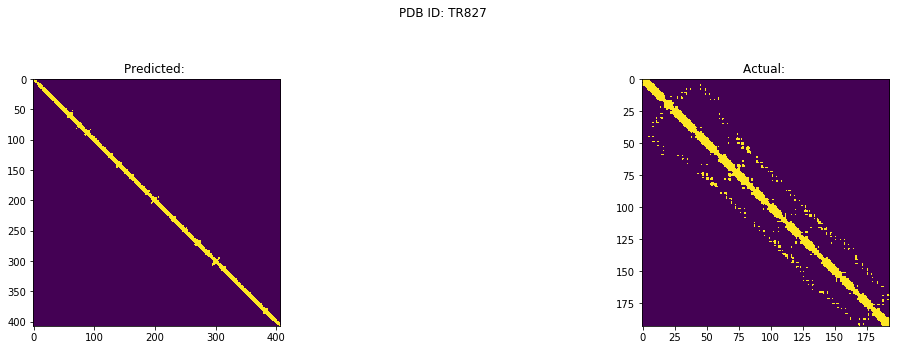

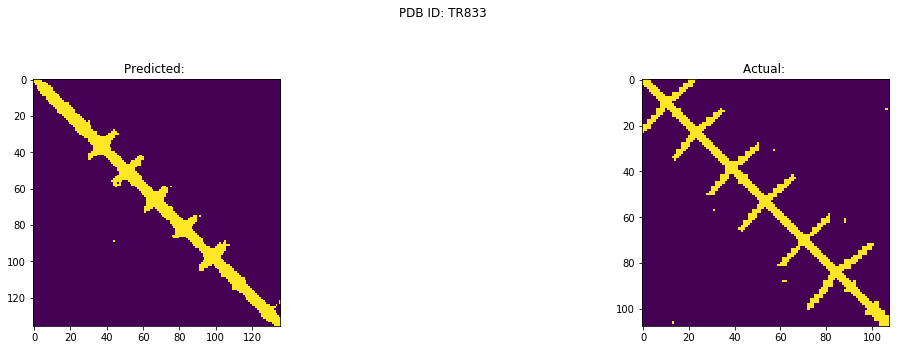

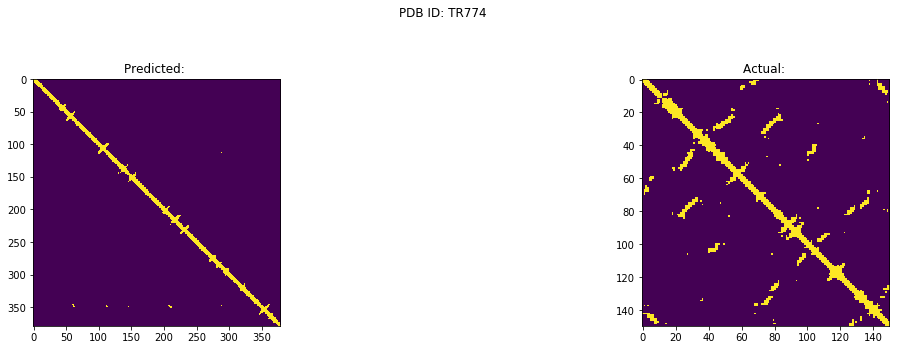

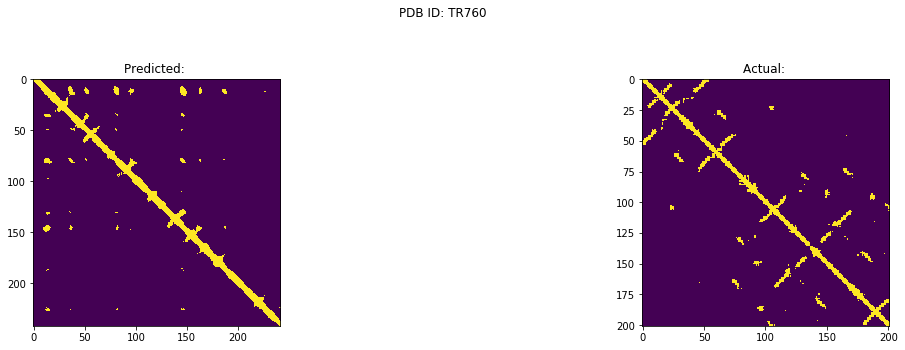

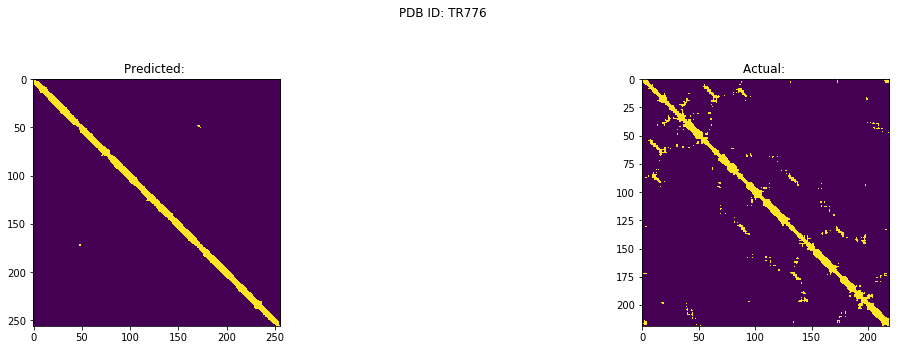

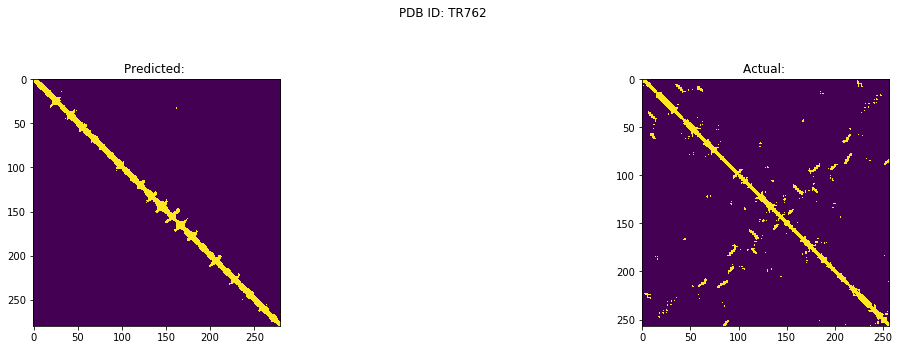

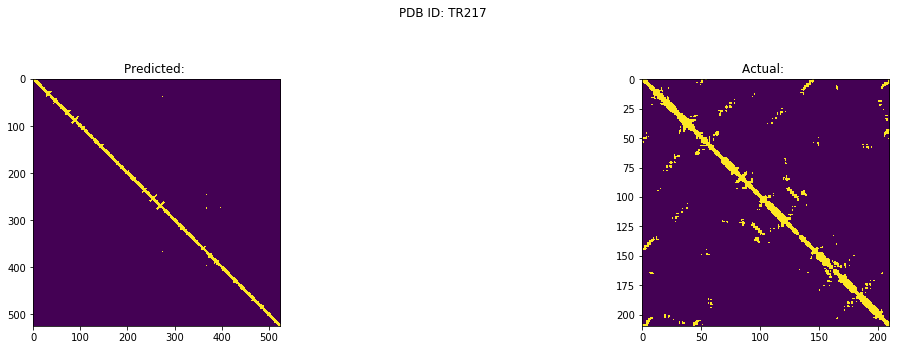

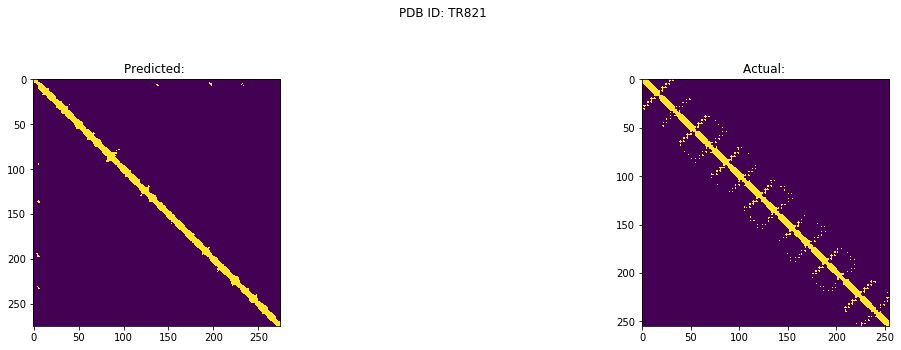

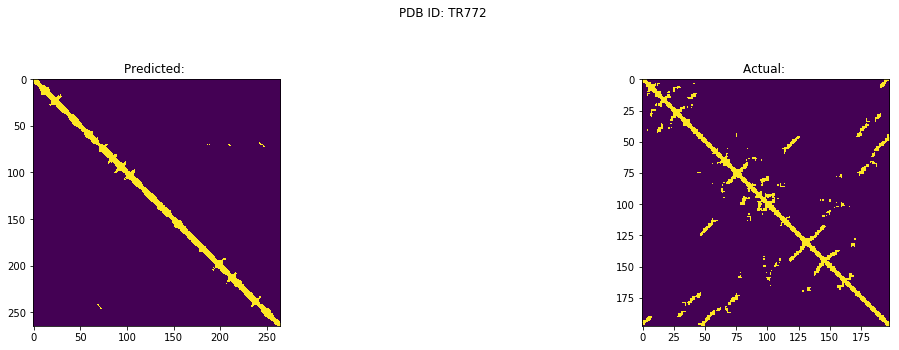

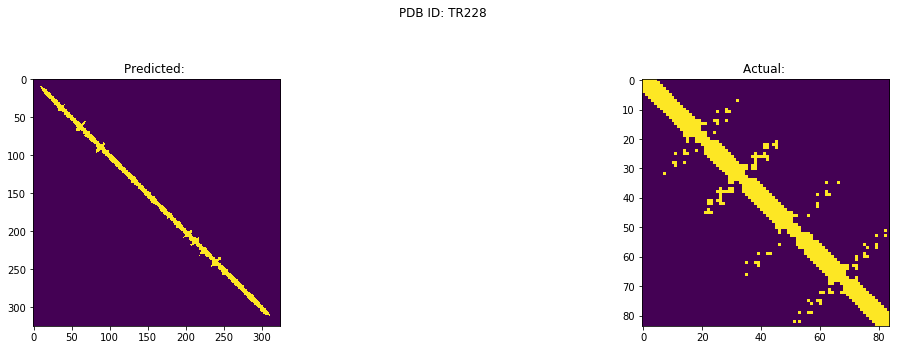

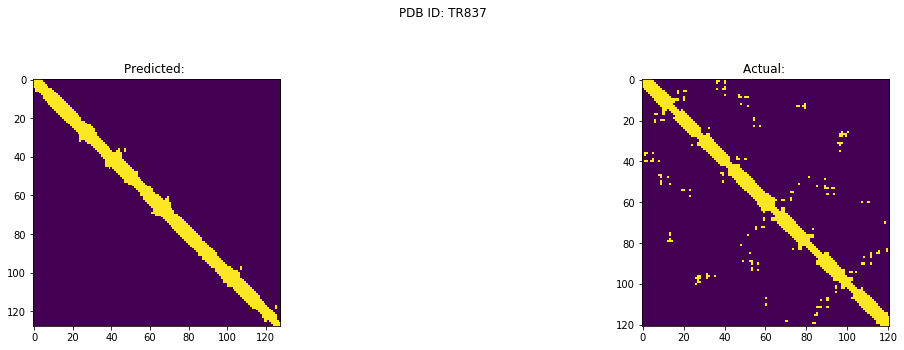

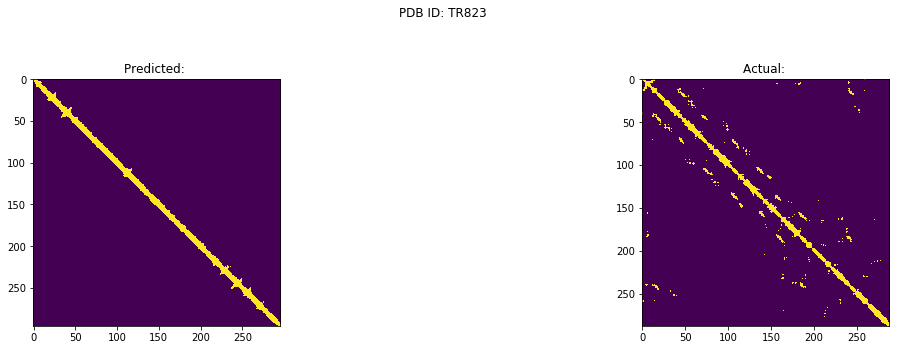

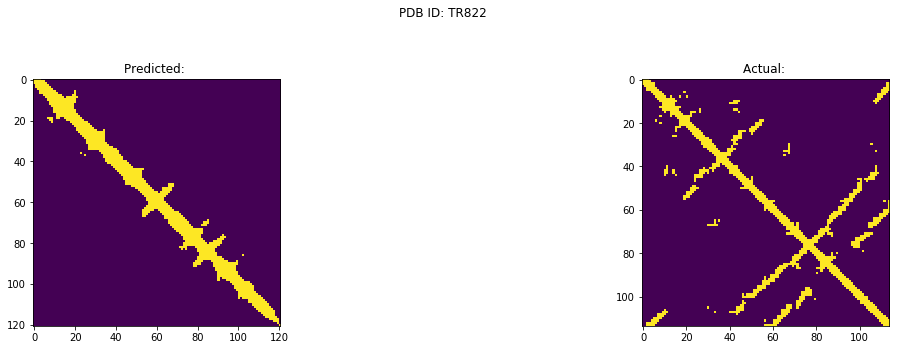

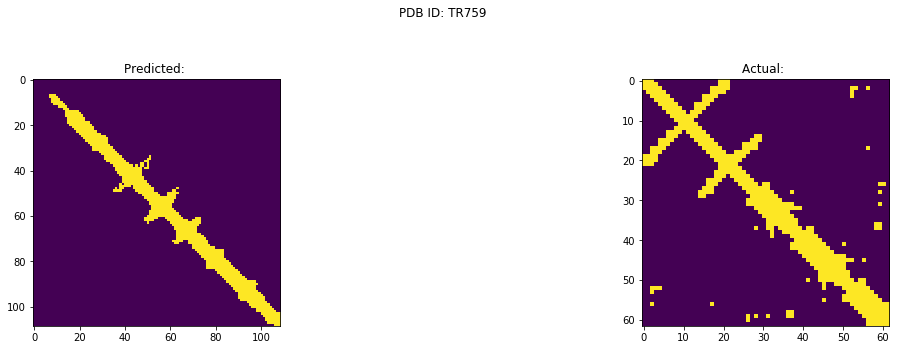

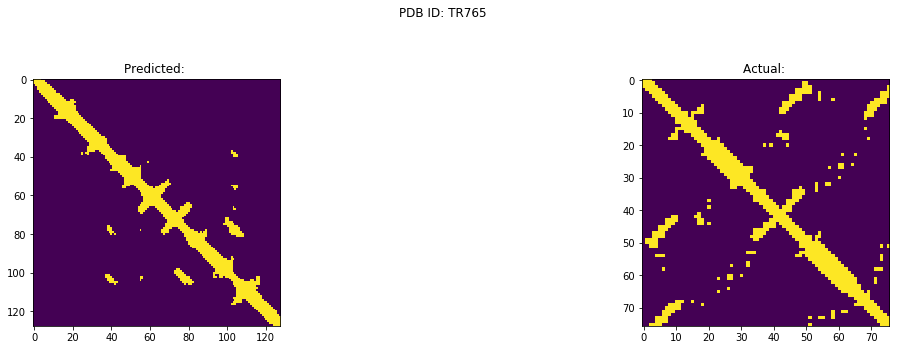

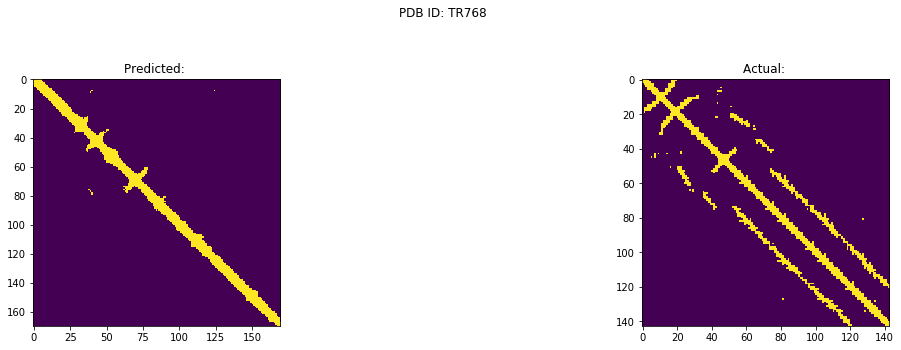

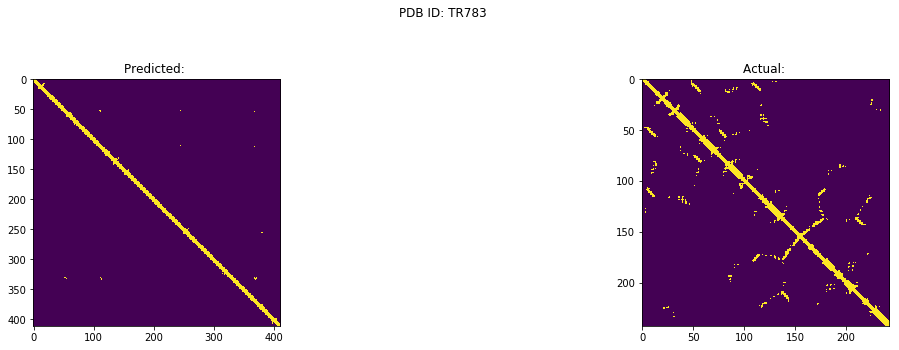

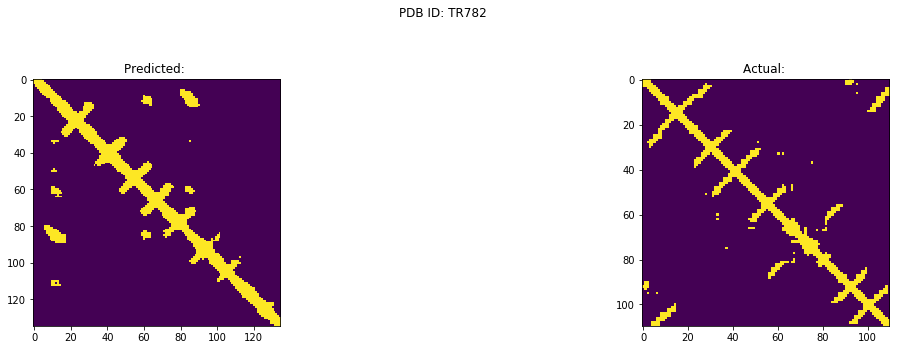

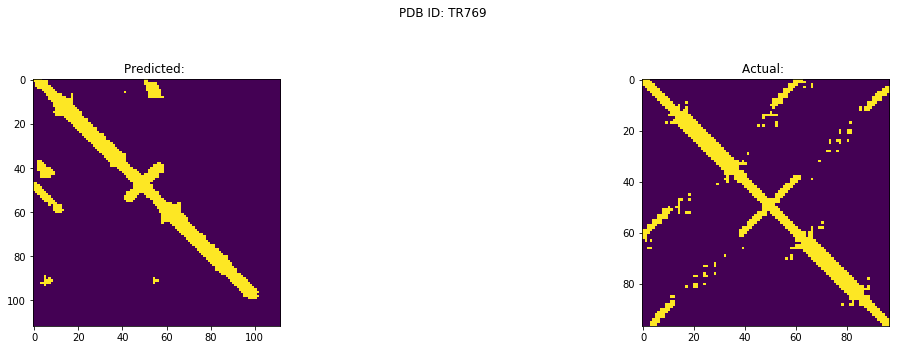

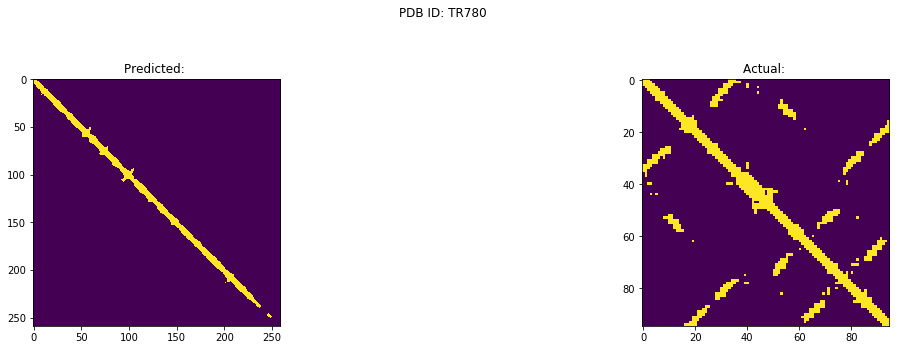

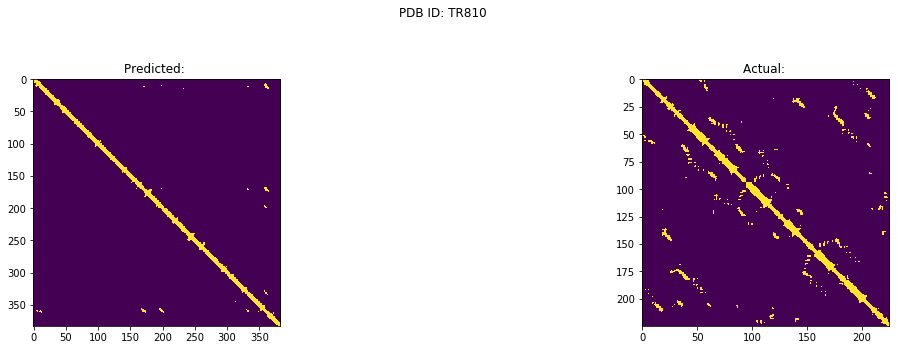

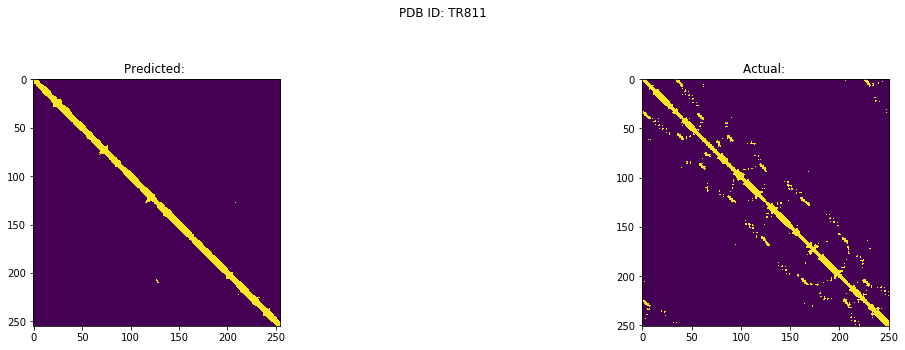

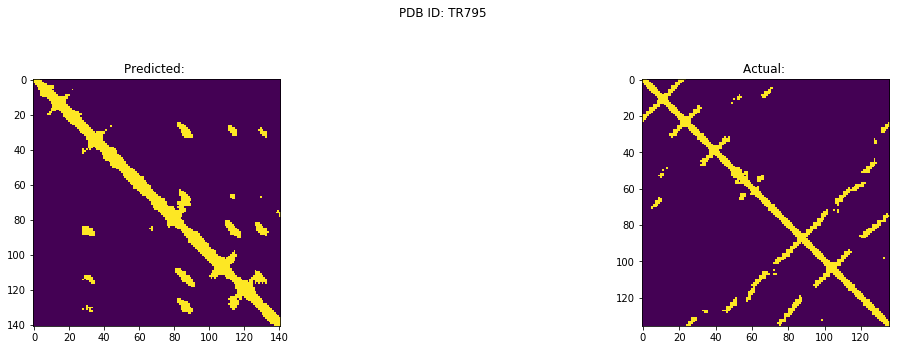

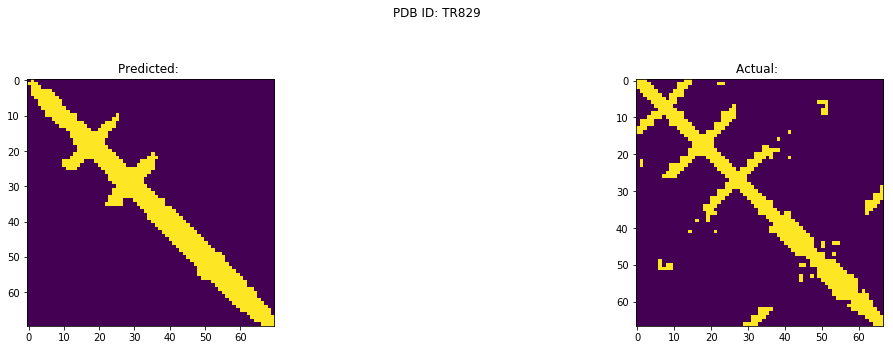

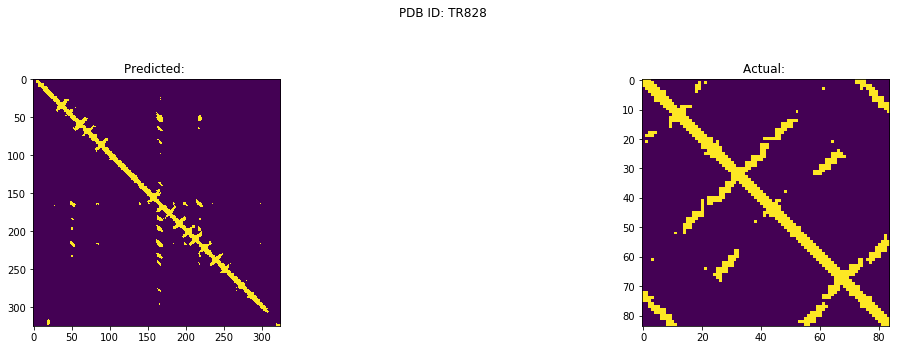

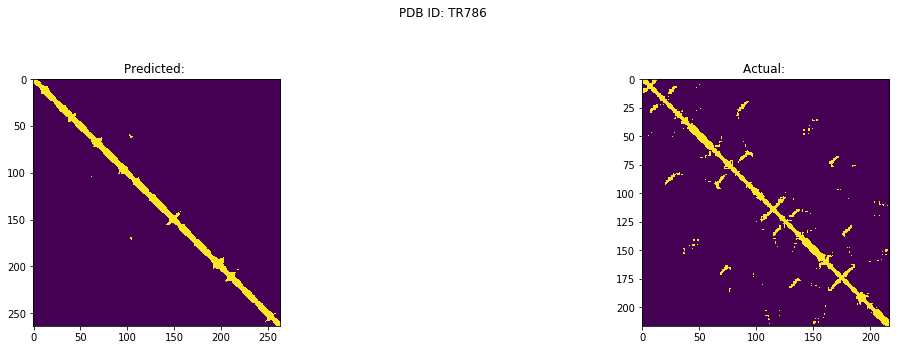

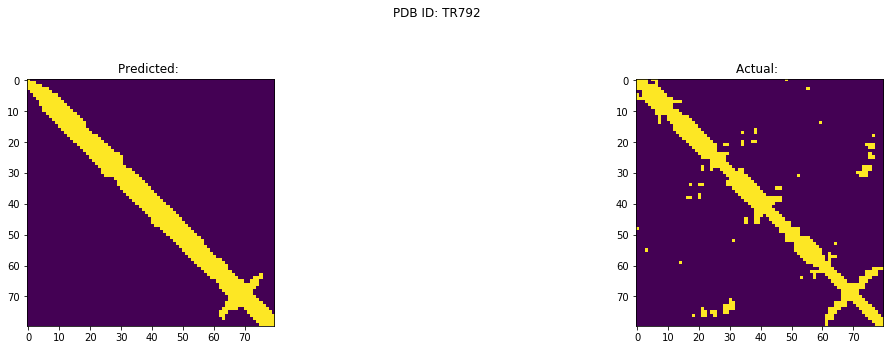

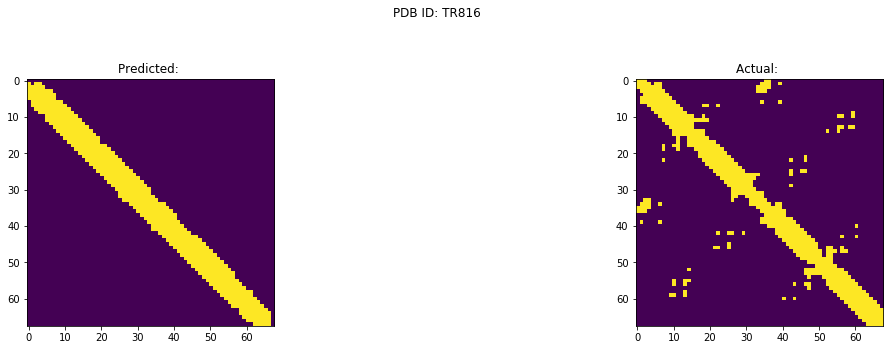

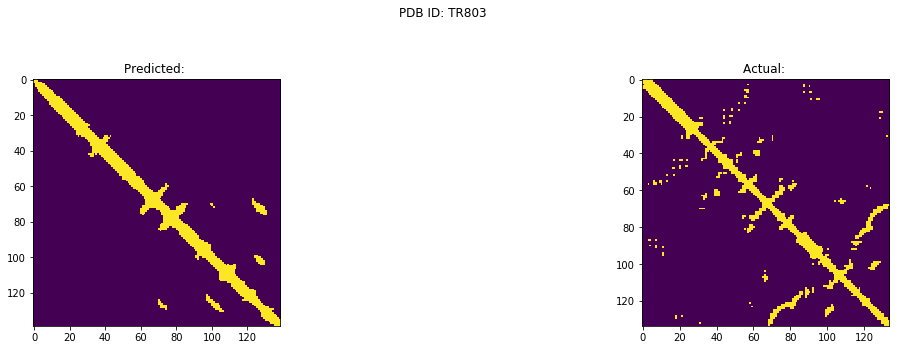

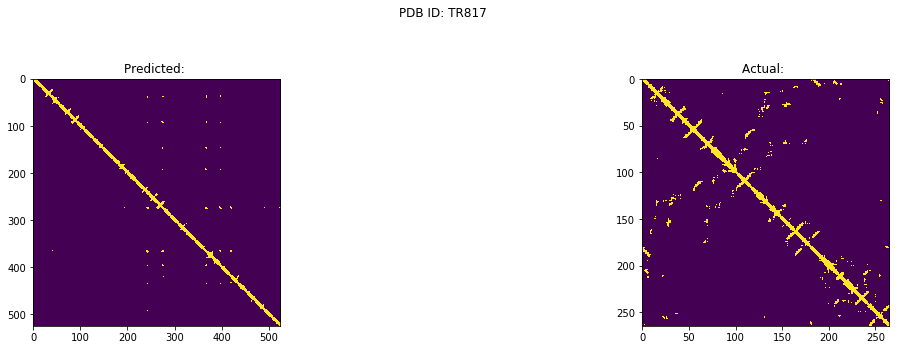

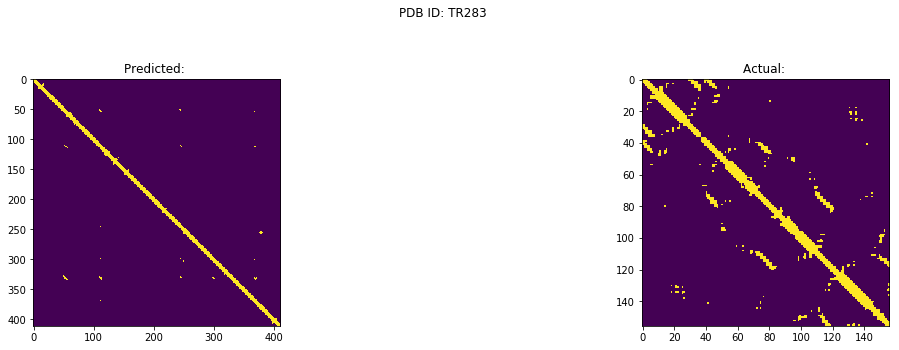

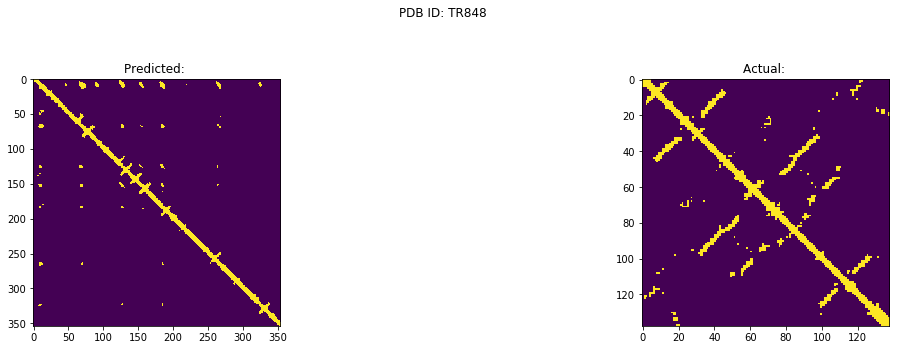

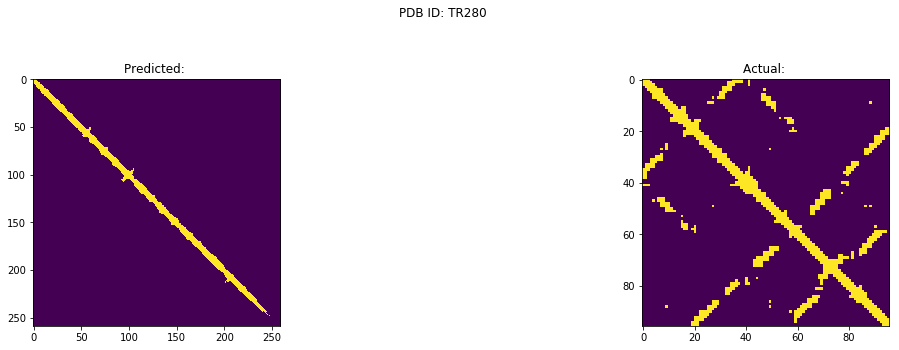

In [10]:
tv.plot_contact_maps(model, fasta_seqs, c_maps)

In [11]:
devtest_aa_dict = np.load(devtest_path + 'devtest_aa.npy')[()]
devtest_cmap_dict = np.load(devtest_path + 'devtest_cmap.npy')[()]

In [12]:
devtest_aa_dict#.dtype

{'2ac1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '5yww': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 '4wyh': array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '5lf9': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 

In [13]:
test_id = '4dv8'
test_input = devtest_aa_dict[test_id]
test_input = test_input.reshape((1,) + test_input.shape)
test_input.shape

(1, 526, 20)

In [14]:
test_prediction = model.predict(test_input)
# test_prediction = test_prediction.reshape(test_prediction.shape[1:])
# test_prediction.shape

In [15]:
test_prediction.shape

(1, 276676, 1)

In [16]:
from math import sqrt
c_map_pred_shape = int (sqrt (test_prediction.shape[1]))
reshaped = test_prediction.reshape((c_map_pred_shape, c_map_pred_shape))
reshaped.shape

(526, 526)

In [17]:
devtest_cmap_dict[test_id].shape

(526, 526)

In [18]:
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(reshaped, devtest_cmap_dict[test_id]))

0.12418450387288403

In [38]:
# def calc_rmse(model, aa_input, cmap_actual):
#     """
#     Given a dictionary of amino acid 1 hot encodings,
#     calculate the average root mean squared error.
#     """

#     rmses = []
#     for pdb_id, cmap in cmap_actual.items():
#         one_hot = aa_input[pdb_id]
#         one_hot = one_hot.reshape((1, ) + one_hot.shape)
#         length = one_hot.shape[1]

#         c_map_pred = model.predict(one_hot)
#         c_map_pred = c_map_pred.reshape((length, length))

#         rmse = sqrt(mean_squared_error(c_map_pred, cmap))
#         rmses.append(rmse)

#     avg = sum(rmses) / len(rmses)

#     return avg

In [28]:
# import random
# d = dict.fromkeys(range(100))
# keys = random.sample(list(d), 10)


# def sample_dict(dict1, dict2, num):
#     """
#     Randomly sample a subset of two dictionaries 
#     with the same keys
#     """

#     sub_dict1 = dict()
#     sub_dict2 = dict()
#     keys = random.sample(list(dict1), num)

#     for key in keys:
#         sub_dict1[key] = dict1[key]
#         sub_dict2[key] = dict2[key]

#     return sub_dict1, sub_dict2


aa_subdict, cmap_subdict = sample_dict(devtest_aa_dict, devtest_cmap_dict, 10)

In [39]:
# aa_subdict
calc_rmse(model, aa_subdict, cmap_subdict)

0.19755294860964995

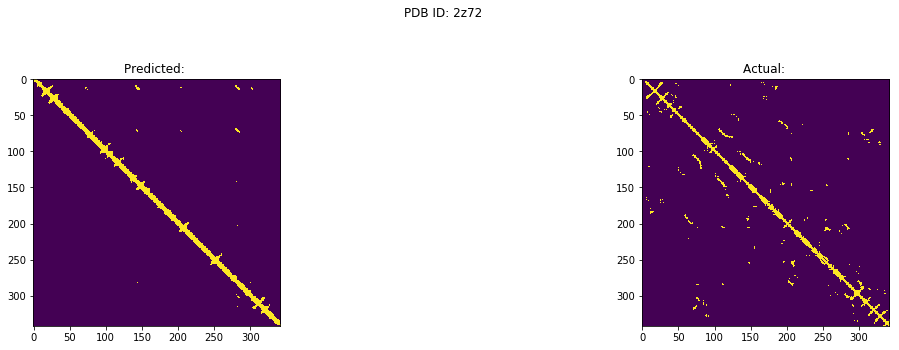

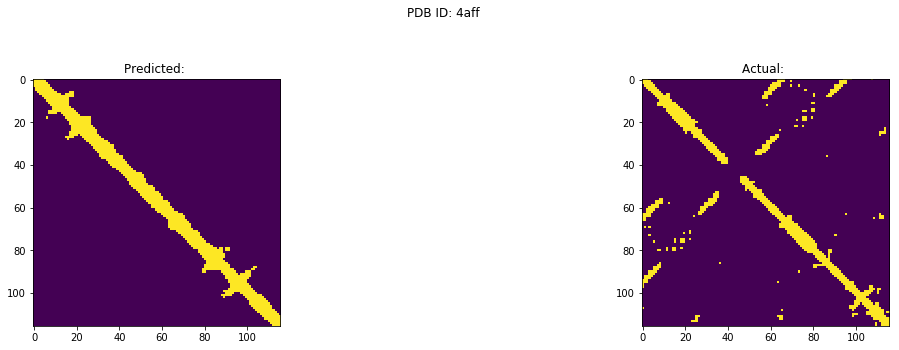

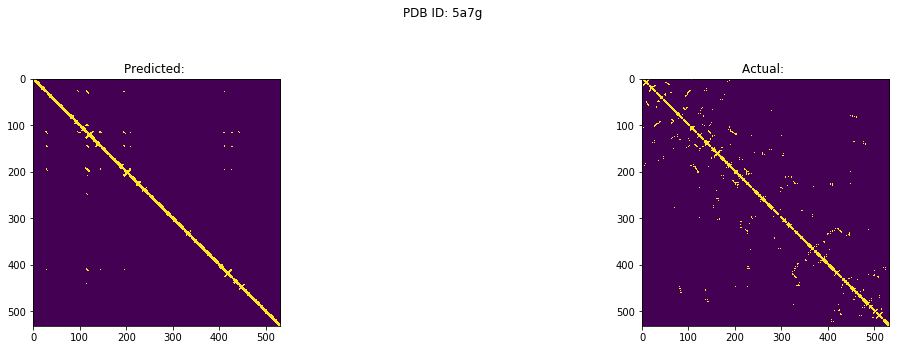

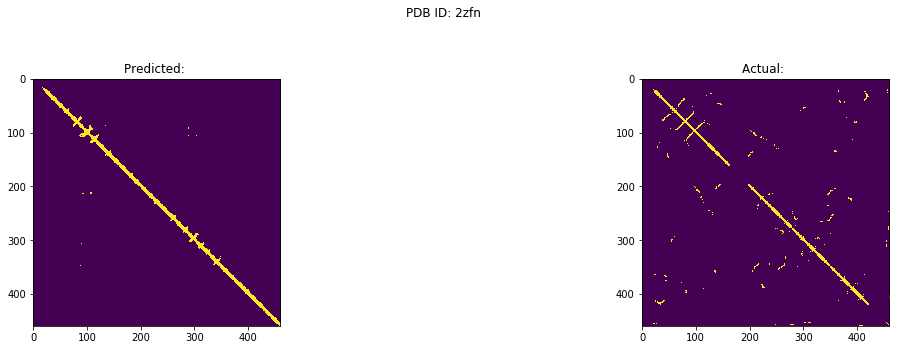

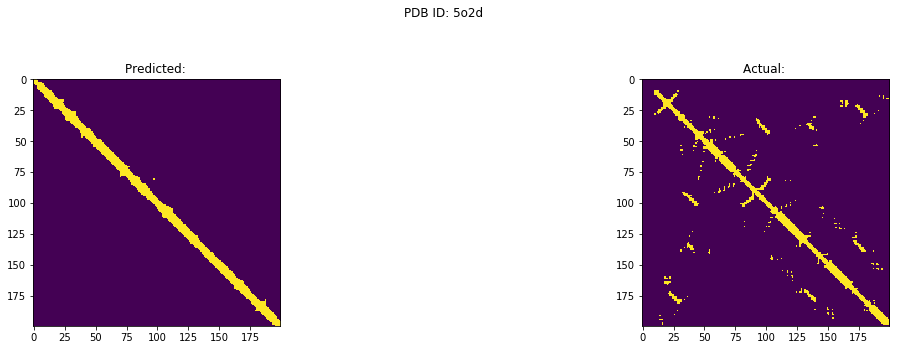

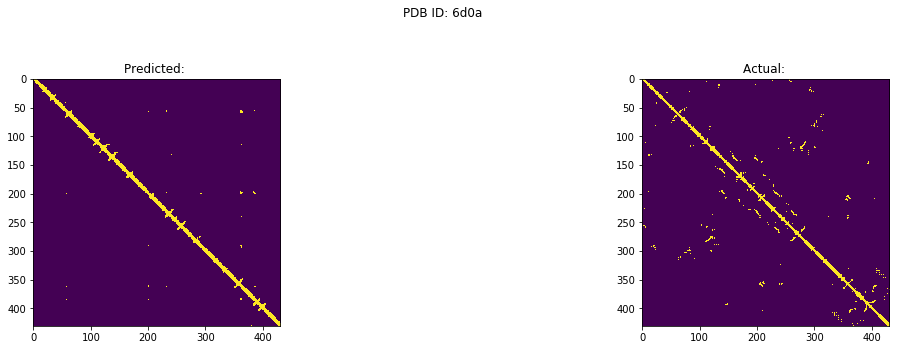

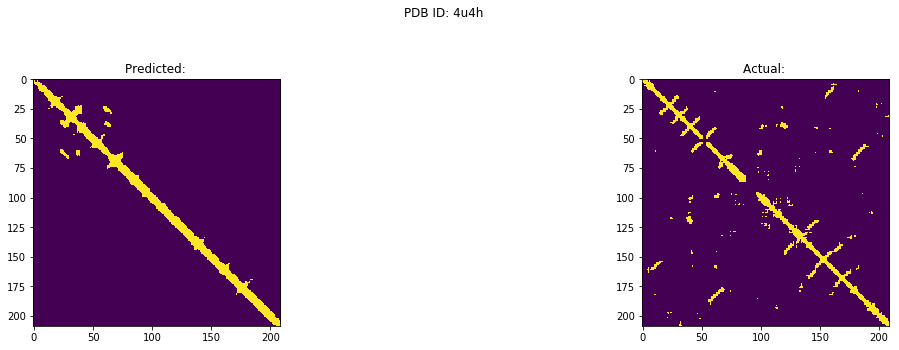

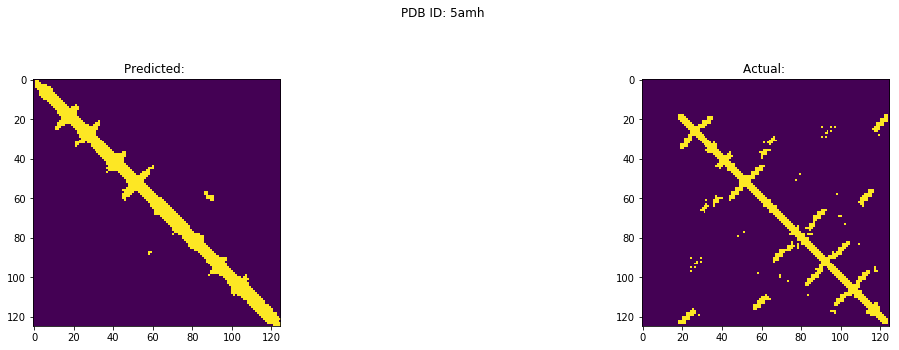

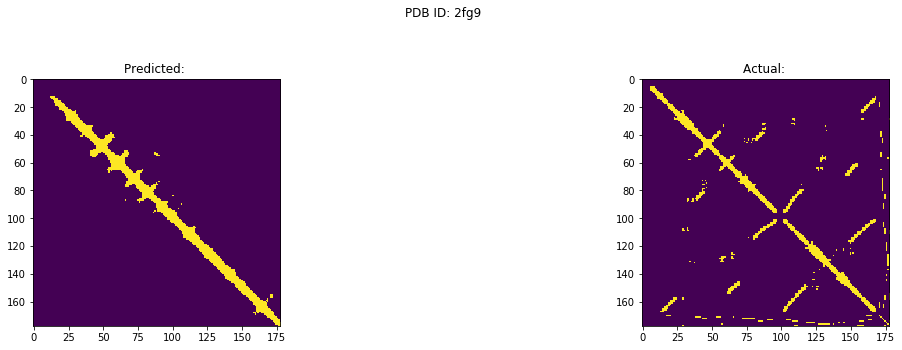

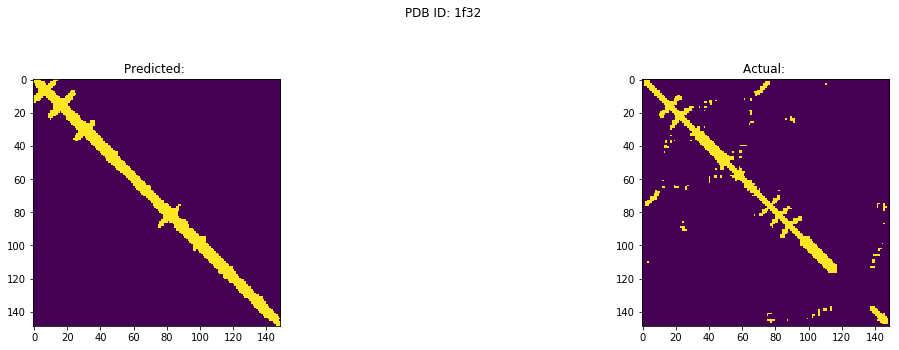

In [37]:
# cmap_subdict
tv.plot_contact_maps(model, aa_subdict, cmap_subdict)

In [50]:
"""
CONFOLD server requires:
E-mail Address
Job Id
Sequence
Secondary Structure
Contacts
"""
import pandas as pd


def contacts_in_RR_format(contact_map, threshold=8):
    """
    Convert the contact map matrix into the RR format.
    (Note that this is currently unordered)

    Format is:

    i  j  d1  d2  p

    i, j are the indices of the residues in contact.
    i < j (since the matrix is symmetrical)

    d1 and d2 indicates the threshold for contact.
    d1 = 0, d2 = 8 Angstrom is the norm.

    p indicates the probability of the two residues 
    in contact. (0.0-1.0)
    Contacts should be listed in decreasing order

    Any pair not listed is considered to not be in contact

    See here for more information:
    http://predictioncenter.org/casp13/index.cgi?page=format

    :param contact_map: contact matrix
    :type  contact_map: numpy array
    :param threshold: threshold of contact
    :param threshold: int
    :returns: a string in the correct format
    :rtype:   str
    """

    df = pd.DataFrame(contact_map)
    columns = df.columns

    contacts = {}
    for index, row in df.iterrows():
        for col_num, col in enumerate(columns):
            prob = row[col]
            if prob > 0.5:
                min1 = min(index, col_num)
                max1 = max(index, col_num)
                contacts[str(min1) + ' ' + str(max1)] = prob
    contact_str = ""
    for resids, prob in contacts.items():
        contact_str += resids + " 0 " + str(threshold) + " " + str(prob) + '\n'
    return contact_str


def write_out_all_predictions(cmaps, path='coordinate_prediction/', maxlen=500):
    """
    Write out the information for all the inputs
    required for PDB file reconstruction.

    Since Confold server only takes in proteins of maximum length 500,
    we will impose a cap.

    :param cmaps: dictionary mapping PDB ID to cmap
    :type  cmaps: dict
    :param path: path to write out
    :type  path: str
    :param 
    """

    import os
    
    for pdb_id, cmap in cmaps.items():
        length = int((cmap.shape[0]))
        
        if length < maxlen:
            if not os.path.exists(path):
                os.makedirs(path)
                
            out = contacts_in_RR_format(cmap)
            out_file = open(path + pdb_id + '.txt', "w+")
            out_file.write(out)
            out_file.close()

In [44]:
print(contacts_in_RR_format(aa_subdict['2z72']))
# aa_subdict.keys()

0 10 0 8 1.0
1 5 0 8 1.0
2 11 0 8 1.0
3 16 0 8 1.0
0 4 0 8 1.0
5 16 0 8 1.0
3 6 0 8 1.0
4 7 0 8 1.0
2 8 0 8 1.0
5 9 0 8 1.0
10 12 0 8 1.0
11 19 0 8 1.0
12 17 0 8 1.0
7 13 0 8 1.0
14 16 0 8 1.0
12 15 0 8 1.0
7 16 0 8 1.0
15 17 0 8 1.0
5 18 0 8 1.0
13 19 0 8 1.0
15 20 0 8 1.0
16 21 0 8 1.0
0 22 0 8 1.0
19 23 0 8 1.0
18 24 0 8 1.0
7 25 0 8 1.0
1 26 0 8 1.0
2 27 0 8 1.0
11 28 0 8 1.0
14 29 0 8 1.0
9 30 0 8 1.0
8 31 0 8 1.0
16 32 0 8 1.0
16 33 0 8 1.0
15 34 0 8 1.0
7 35 0 8 1.0
3 36 0 8 1.0
8 37 0 8 1.0
9 38 0 8 1.0
13 39 0 8 1.0
17 40 0 8 1.0
11 41 0 8 1.0
14 42 0 8 1.0
12 43 0 8 1.0
3 44 0 8 1.0
6 45 0 8 1.0
1 46 0 8 1.0
5 47 0 8 1.0
2 48 0 8 1.0
9 49 0 8 1.0
12 50 0 8 1.0
3 51 0 8 1.0
16 52 0 8 1.0
8 53 0 8 1.0
9 54 0 8 1.0
15 55 0 8 1.0
15 56 0 8 1.0
3 57 0 8 1.0
7 58 0 8 1.0
8 59 0 8 1.0
13 60 0 8 1.0
7 61 0 8 1.0
10 62 0 8 1.0
12 63 0 8 1.0
2 64 0 8 1.0
16 65 0 8 1.0
19 66 0 8 1.0
9 67 0 8 1.0
5 68 0 8 1.0
7 69 0 8 1.0
8 70 0 8 1.0
8 71 0 8 1.0
17 72 0 8 1.0
17 73 0 8 1.0
0 74 0 8 1.0

In [48]:
cmap_subdict['2z72'].shape#[0]

(342, 342)

In [51]:
write_out_all_predictions(cmap_subdict)